In [1]:
g=9.81

K_T=1
K_d=1# maybe this is 0 idk

#motor
mm=.075#kg

#propellor
mp=.01503 #kg

#frame
mf=.300 #kg
l=.127 #m

#entire copter 
m=mm+mp+mf

I_x=2*(mm+mp)*l**2 + (1/6)*mf*l**2
I_y=2*(mm+mp)*l**2 + (1/6)*mf*l**2
I_z=4*(mm+mp)*l**2 + (1/3)*mf*l**2


def ddxi(phi,theta,psi):
    ax=K_T*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))*(w1**2 + w2**2 + w3**2 + w4**2)/m
    ay=K_T*(-sin(phi)*cos(psi) + sin(psi)*sin(theta)*cos(phi))*(w1**2 + w2**2 + w3**2 + w4**2)/m
    az=(K_T*(w1**2 + w2**2 + w3**2 + w4**2)*cos(phi)*cos(theta) - g*m)/m

    return(ax,ay,az)

def dw(phi,theta,psi,dphi,dtheta,dpsi): 
    
    dwx=K_T*l*(-w2**2 + w4**2)/I_x - (I_y - I_z)*(-sin(phi)*dtheta + cos(phi)*cos(theta)*dpsi*sin(phi)*cos(theta)*dpsi + cos(phi)*dtheta)/I_x
    dwy=K_T*l*(w1**2 - w3**2)/I_y - (-I_x + I_z)*(-sin(phi)*dtheta + cos(phi)*cos(theta)*dpsi)*(-sin(theta)*dpsi + dphi)/I_y
    dwz=K_d*(w1**2 - w2**2 + w3**2 - w4**2)/I_z - (I_x - I_y)*(-sin(theta)*dpsi + dphi)*(sin(phi)*cos(theta)*dpsi + cos(phi)*dtheta)/I_z
                                                                                        
    return(dwx,dwy,dwz)   


In [2]:
#hover for 2 mins at 1m 

import numpy as np
from sympy import * 

w1=0.97803301324656
w2=0.97803301324656
w3=0.97803301324656
w4=0.97803301324656

x=0
y=0
z=1
dx=0
dy=0
dz=0
phi=0
theta=0
psi=0
dphi=0
dtheta=0
dpsi=0

Tmax=120
dt=.1
Tlist=np.arange(0,Tmax+dt,dt)

X=[]
Y=[]
Z=[]
Phi=[]
Theta=[]
Psi=[]

print(m*g/4)

for t in Tlist:
    ax,ay,az=ddxi(phi,theta,psi)
    dwx,dwy,dwz=dw(phi,theta,psi,dphi,dtheta,dpsi)
    
    x += dx*dt + .5*ax*dt**2 
    y += dy*dt + .5*ay*dt**2 
    z += dz*dt + .5*az*dt**2 
    dx+= ax*dt
    dy+= ay*dt
    dz+= az*dt

    phi   += dphi*dt   + .5*dwx*dt**2
    theta += dtheta*dt + .5*dwy*dt**2
    psi   += dpsi*dt   + .5*dwz*dt**2
    dphi  += dwx*dt
    dtheta+= dwy*dt
    dpsi  += dwz*dt
    X.append(x)
    Y.append(y)
    Z.append(z)
    Phi.append(phi)
    Theta.append(theta)
    Psi.append(psi)


0.956548575


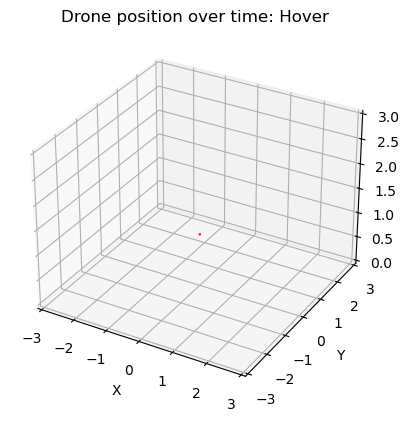

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Generate some random data for demonstration

# Create figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot initial data points
points, = ax.plot([], [], [], 'bo')

# Set the axes labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Drone position over time: Hover')

ax.set_xlim(-3,3)  # Set x-axis limits
ax.set_ylim(-3,3)  # Set y-axis limits
ax.set_zlim(0,3)  # Set z-axis limits

ax.plot3D(X, Y, Z, 'r-')

# Function to update the plot for animation
def update(frame):
    points.set_data(X[:frame], Y[:frame])
    points.set_3d_properties(Z[:frame])
    return points,

# Create animation
ani = FuncAnimation(fig, update, frames=len(X), blit=True)

plt.show()

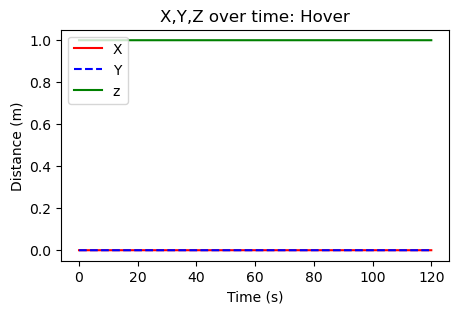

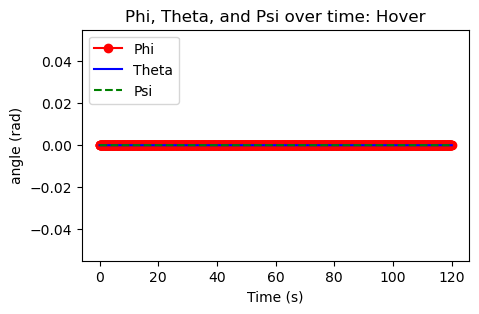

In [4]:
plt.figure(figsize=(5,3))
plt.title("X,Y,Z over time: Hover")

plt.plot(Tlist, X, 'r-', label='X' )
plt.plot(Tlist, Y, 'b--', label='Y' )
plt.plot(Tlist, Z, 'g-', label='z' )

plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

plt.legend(loc="upper left")

plt.figure(figsize=(5,3))
plt.title("Phi, Theta, and Psi over time: Hover")

plt.plot(Tlist, Phi, 'r-o', label='Phi' )
plt.plot(Tlist, Theta, 'b-', label='Theta' )
plt.plot(Tlist, Psi, 'g--', label='Psi' )

plt.xlabel('Time (s)')
plt.ylabel('angle (rad)')

plt.legend(loc="upper left")

In [5]:
#circle radius 2m altidude of 1m, speed .5m/s for 1 min

import numpy as np
from sympy import * 

x=0
y=-2
z=1
dx=.5
dy=0
dz=0
phi=0
theta=0
psi=0
dphi=0
dtheta=0
dpsi=.25

# (K_T*(w1**2 + w2**2 + w3**2 + w4**2)*cos(phi)*cos(theta) - g*m)/m


w1=(g*m/(4*cos(phi)*(cos(theta))))**.5
w2=(g*m/(4*cos(phi)*(cos(theta))))**.5
w3=(g*m/(4*cos(phi)*(cos(theta))))**.5
w4=(g*m/(4*cos(phi)*(cos(theta))))**.5

Tmax=60
dt=.01
Tlist=np.arange(0,Tmax+dt,dt)

X=[]
Y=[]
Z=[]
Phi=[]
Theta=[]
Psi=[]

print(m*g/4)

for t in Tlist:
    ax,ay,az=ddxi(phi,theta,psi)
    dwx,dwy,dwz=dw(phi,theta,psi,dphi,dtheta,dpsi)

    V=.5

    dx = V*cos(psi)
    dy = V*sin(psi)
    dz+= az*dt
    x += dx*dt + .5*ax*dt**2 
    y += dy*dt + .5*ay*dt**2 
    z += dz*dt + .5*az*dt**2 

    dphi  += dwx*dt
    dtheta+= dwy*dt
    dpsi  += dwz*dt
    phi   += dphi*dt   + .5*dwx*dt**2
    theta += dtheta*dt + .5*dwy*dt**2
    psi   += dpsi*dt   + .5*dwz*dt**2
    
    X.append(x)
    Y.append(y)
    Z.append(z)
    Phi.append(phi)
    Theta.append(theta)
    Psi.append(psi)
    
    

    w1=(g*m/(4*cos(phi)*(cos(theta))))**.5
    w2=(g*m/(4*cos(phi)*(cos(theta))))**.5
    w3=(g*m/(4*cos(phi)*(cos(theta))))**.5
    w4=(g*m/(4*cos(phi)*(cos(theta))))**.5


0.956548575


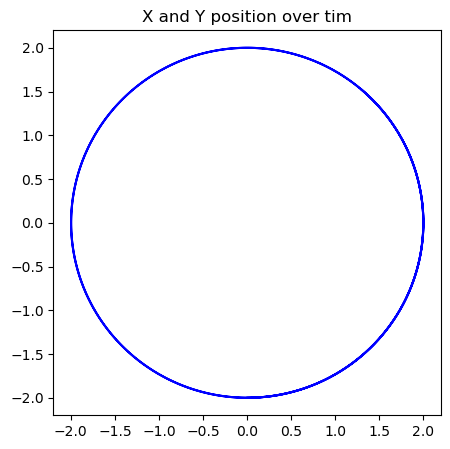

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.title("X and Y position over tim")
# plt.plot(Tlist, Psi, color="red")

plt.plot(X, Y, color="blue")

# plt.plot(Tlist,Dx, color="green")
# plt.plot(Tlist,Dy, color="pink")

plt.show()

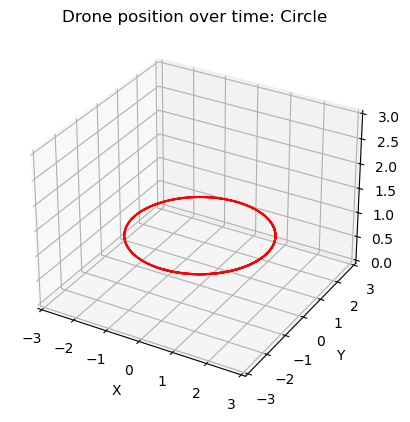

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Generate some random data for demonstration

# Create figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot initial data points
points, = ax.plot([], [], [], 'bo')

# Set the axes labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Drone position over time: Circle')


ax.set_xlim(-3,3)  # Set x-axis limits
ax.set_ylim(-3,3)  # Set y-axis limits
ax.set_zlim(0,3)  # Set z-axis limits

ax.plot3D(X, Y, Z, 'r-')

# Function to update the plot for animation
def update(frame):
    points.set_data(X[:frame], Y[:frame])
    points.set_3d_properties(Z[:frame])
    return points,

# Create animation
ani = FuncAnimation(fig, update, frames=len(X), blit=True)

plt.show()

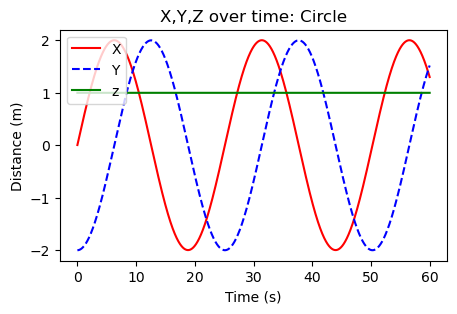

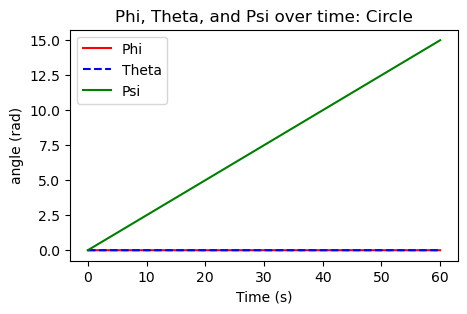

In [8]:
plt.figure(figsize=(5,3))
plt.title("X,Y,Z over time: Circle")

plt.plot(Tlist, X, 'r-', label='X' )
plt.plot(Tlist, Y, 'b--', label='Y' )
plt.plot(Tlist, Z, 'g-', label='z' )

plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

plt.legend(loc="upper left")

plt.figure(figsize=(5,3))
plt.title("Phi, Theta, and Psi over time: Circle")

plt.plot(Tlist, Phi, 'r-', label='Phi' )
plt.plot(Tlist, Theta, 'b--', label='Theta' )
plt.plot(Tlist, Psi, 'g-', label='Psi' )

plt.xlabel('Time (s)')
plt.ylabel('angle (rad)')

plt.legend(loc="upper left")